In [54]:
import itertools
import pandas as pd
import numpy as np

from collections import defaultdict

class Solver:    
    def __init__(self, ranges):
        self.ranges = ranges
        self.sol = defaultdict(list) 
        self.det = 0 
    

    def select(self, n):
        for a1 in range(self.ranges[0],0):
            for a2 in range(max(self.ranges[0], a1),0):
                val0 = a1 * a2 -1
                if a1 * a2 <= 1:
                    continue
                for a3 in range(self.ranges[2],-1):
                    val1 = a3 * val0 - a2
                    if val1 >= 0: 
                        continue
                    for a4 in range(max(self.ranges[3], a3),-1):
                        val2 = a4 * val1 - a2 * a3
                        if val2 <= 0:
                            continue
                        for a5 in range(self.ranges[4],-1):
                            if a1 == a2 and a4 > a5:
                                continue
                            val3 = a5 * val2 + a3 + a4 - a1 * a3 * a4 
                            if val3 >= 0:
                                continue
                            a6 = (n + a5 * a5 * val2) / val3 - a5
                            if int(a6) == a6 and a6 < -1 and a6>=a5:
                                if a1 == a2 and a5 == a3 and a4 > a6:
                                    continue
                                a6 = int(a6)
                                self.sol[n].append((a2, a1, a6, a5, a4, a3))


    def get_solutions(self):
        return dict(self.sol)  # Convert defaultdict to normal dict before returning
    
    # def get_max_det(self):
    #     return self.det
    
    def test(self, n):
        print(f"Testing determinant {n}...")
        for a1 in range(self.ranges[0],0):
            for a2 in range(max(self.ranges[0], a1),0):
                if a1 * a2 <= 1:
                    continue
                for a3 in range(self.ranges[2],-1):
                    val1 = -a2 - a3 + a1 * a2 * a3
                    if val1 >= 0: 
                        continue
                    for a4 in range(max(self.ranges[3], a3),-1):
                        val2 = -a2 * a4 - a3 * a4 + a2 * a3 * (-1 + a1 * a4)
                        if val2 <= 0:
                            continue
                        for a5 in range(self.ranges[4],-1):
                            if a1 == a2 and a4 > a5:
                                continue
                            val3 = a4 - a2 * a4 * a5 + a3 * (1 - a2 * a5 - a4 * a5 + a1 * a4 * (-1 + a2 * a5))
                            if val3 >= 0:
                                continue
                            a6 = (-a4 * a5 + a3 * (-1 + a1 * a4) * a5 + n) / (a4 - a2 * a4 * a5 + a3 * (1 - a2 * a5 - a4 * a5 + a1 * a4 * (-1 + a2 * a5)))
                            if int(a6) == a6 and a6 < -1 and a6>=a5:
                                if a1 == a2 and a5 == a3 and a4 > a6:
                                    continue
                                a6 = int(a6)
                                print((a2, a1, a6, a5, a4, a3))
                                self.sol[n].append((a2, a1, a6, a5, a4, a3))

    def test2(self, n):
        print(f"Testing determinant {n}...")
        for a1 in range(self.ranges[0],0):
            for a2 in range(self.ranges[1],0):
                if a1 < a2 or a1 * a2 <= 1:
                    continue
                for a3 in range(self.ranges[2],0):
                    val1 = -a2 - a3 + a1 * a2 * a3
                    if val1 >= 0: 
                        continue
                    for a4 in range(self.ranges[3],-1):
                        if a3 < a4:
                            continue
                        val2 = -a2 * a4 - a3 * a4 + a2 * a3 * (-1 + a1 * a4)
                        if val2 <= 0:
                            continue
                        for a5 in range(self.ranges[4],-1):
                            if a1 == a2 and a3 < a5:
                                continue
                            val3 = a4 - a2 * a4 * a5 + a3 * (1 - a2 * a5 - a4 * a5 + a1 * a4 * (-1 + a2 * a5))
                            if val3 >= 0:
                                continue
                            for a6 in range(self.ranges[5],-1):
                                if (a1 == a2 and a5 == a3 and a4 < a6) or (a5 < a6):
                                    continue
                                val4 = (a4 * (a5 + a6 - a2 * a5 * a6) + a3 * (a6 - a1 * a4 * a6 + a5 * (1 - a2 * a6 - a4 * a6 + a1 * a4 * (-1 + a2 * a6))))                
                                if val4 == n:
                                    print((a1, a2, a3, a4, a5, a6))
                                    self.sol[val4].append((a1, a2, a3, a4, a5, a6)) 

# from H_shape import Solver

def save(solutions, filename, num_columns = 6):
    column_names = [f"a{i+1}" for i in range(num_columns)]

    # Create a DataFrame
    df = pd.DataFrame(solutions, columns=column_names)

    df.to_csv(filename, index=False)

    print(f"Solutions exported to {filename}")
    
    return 


In [55]:
r = [-7, -1, -133, -13, -97, -12]
solver2 = Solver(r)
solver2.select(1)

solutions2 = solver2.get_solutions()

save(solutions2[1], "new_test_det1.csv")


Solutions exported to new_test_det1.csv


In [56]:
r = [-10] + [-200] * 5
solver = Solver(r)
solver.select(2)
solution = solver.get_solutions()
save(solution[2], "det_2_200.csv")

Solutions exported to det_2_200.csv


In [3]:
import itertools
import pandas as pd
import numpy as np

from collections import defaultdict

class H_shape:  # H-like shape but 2 legs on one side and 3 on the other  
    def __init__(self, ranges):
        self.ranges = ranges
        self.sol = defaultdict(list) 
        self.dict = defaultdict(list)
    
    def find_all(self):
        print(f"Searching for all negative definite solutions...")
        num = 1
        for a1 in range(self.ranges[0],0):
            for a2 in range(max(self.ranges[0], a1),0):
                val0 = a1 * a2 -1
                if a1 * a2 <= 1:
                    continue
                for a3 in range(self.ranges[2],-1):
                    val1 = a3 * val0 - a2
                    if val1 >= 0: 
                        continue
                    for a4 in range(max(self.ranges[3], a3),-1):
                        val2 = a4 * val1 - a2 * a3
                        if val2 <= 0:
                            continue
                        for a5 in range(self.ranges[4],-1):
                            if a1 == a2 and a4 > a5:
                                continue
                            val3 = a5 * val2 + a3 + a4 - a1 * a3 * a4 
                            if val3 >= 0:
                                continue
                            for a6 in range(max(a5,self.ranges[5]),-1):
                                if a1 == a2 and a5 == a3 and a4 > a6:
                                    continue
                                val4 = a6 * val3 + a5 * (a1 * a3 * a4 - a3 - a4)
                                if int(val4) == val4:
                                    val4 = int(val4)
                                    self.sol[val4].append((a2, a1, a6, a5, a4, a3))
                                    self.dict[num].append(val4)
                                    num += 1
                            # a6 = (n + a5 * a5 * val2) / val3 - a5
                            # if int(a6) == a6 and a6 < -1 and a6>=a5:
                            #     if a1 == a2 and a5 == a3 and a4 > a6:
                            #         continue
                            #     a6 = int(a6)


    def select(self, n):
        print(f"Searching for determinant {n}...")
        for a1 in range(self.ranges[0],0):
            for a2 in range(max(self.ranges[0], a1),0):
                val0 = a1 * a2 -1
                if a1 * a2 <= 1:
                    continue
                for a3 in range(self.ranges[2],-1):
                    val1 = a3 * val0 - a2
                    if val1 >= 0: 
                        continue
                    for a4 in range(max(self.ranges[3], a3),-1):
                        val2 = a4 * val1 - a2 * a3
                        if val2 <= 0:
                            continue
                        for a5 in range(self.ranges[4],-1):
                            if a1 == a2 and a4 > a5:
                                continue
                            val3 = a5 * val2 + a3 + a4 - a1 * a3 * a4 
                            if val3 >= 0:
                                continue
                            a6 = (n + a5 * a5 * val2) / val3 - a5
                            if int(a6) == a6 and a6 < -1 and a6>=a5:
                                if a1 == a2 and a5 == a3 and a4 > a6:
                                    continue
                                a6 = int(a6)
                                self.sol[n].append((a2, a1, a6, a5, a4, a3))


    def get_solutions(self):
        return dict(self.sol)  # Convert defaultdict to normal dict before returning
    def get_det(self):
        return dict(self.dict)

def save(solutions, filename, num_columns = 6):
    column_names = [f"a{i+1}" for i in range(num_columns)]

    # Create a DataFrame
    df = pd.DataFrame(solutions, columns=column_names)

    df.to_csv(filename, index=False)

    print(f"Solutions exported to {filename}")
    
    return 

print(f"H_shape.py loaded successfully")


H_shape.py loaded successfully


Searching for all negative definite solutions...


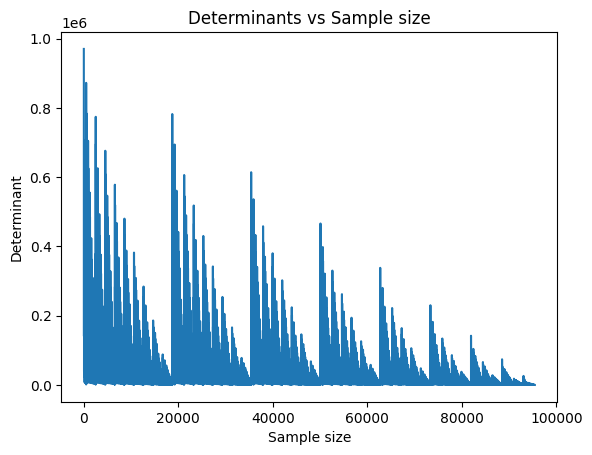

In [4]:
r = [-10] * 6
solver = H_shape(r)
solver.find_all()
solution = solver.get_det()
import matplotlib.pyplot as plt
import numpy as np

x = list(solution.keys())
y = list(solution.values())

plt.plot(x, y)
plt.xlabel('Sample size')
plt.ylabel('Determinant')
plt.title('Determinants vs Sample size')
plt.show()

